In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df = pd.read_csv(r'C:\Users\Dell\Desktop\DataSets\Breast_cancer_dataset.csv')

In [46]:
df.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [47]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [48]:
features = [
    'diagnosis',
    'radius_mean',
    'texture_mean',
    'perimeter_mean',
    'area_mean',
    'concavity_mean',
    'concave points_mean',
    'symmetry_mean',
    'fractal_dimension_mean']

In [49]:
df = df[features]

In [50]:
df['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [51]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
       'fractal_dimension_mean'],
      dtype='object')

In [52]:
cat_cols = [i for i in df.columns if df[i].dtype == 'O']
num_cols = [i for i in df.columns if df[i].dtype != 'O']

In [53]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)

C:\Users\Dell\AppData\Local\Temp\ipykernel_19844\244806831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0}).astype(int)


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   diagnosis               569 non-null    int32  
 1   radius_mean             569 non-null    float64
 2   texture_mean            569 non-null    float64
 3   perimeter_mean          569 non-null    float64
 4   area_mean               569 non-null    float64
 5   concavity_mean          569 non-null    float64
 6   concave points_mean     569 non-null    float64
 7   symmetry_mean           569 non-null    float64
 8   fractal_dimension_mean  569 non-null    float64
dtypes: float64(8), int32(1)
memory usage: 37.9 KB


In [55]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,1,17.99,10.38,122.80,1001.0,0.30010,0.14710,0.2419,0.07871
1,1,20.57,17.77,132.90,1326.0,0.08690,0.07017,0.1812,0.05667
2,1,19.69,21.25,130.00,1203.0,0.19740,0.12790,0.2069,0.05999
3,1,11.42,20.38,77.58,386.1,0.24140,0.10520,0.2597,0.09744
4,1,20.29,14.34,135.10,1297.0,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.24390,0.13890,0.1726,0.05623
565,1,20.13,28.25,131.20,1261.0,0.14400,0.09791,0.1752,0.05533
566,1,16.60,28.08,108.30,858.1,0.09251,0.05302,0.1590,0.05648
567,1,20.60,29.33,140.10,1265.0,0.35140,0.15200,0.2397,0.07016


In [56]:
x = df.drop('diagnosis', axis=1)
y = df['diagnosis']

In [57]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [58]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9239766081871345
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [60]:
confusion_matrix(y_test, y_pred)

array([[102,   6],
       [  7,  56]], dtype=int64)

[Text(0.6111111111111112, 0.9444444444444444, 'x[5] <= 0.056\ngini = 0.468\nsamples = 398\nvalue = [249, 149]'),
 Text(0.4074074074074074, 0.8333333333333334, 'x[3] <= 698.75\ngini = 0.15\nsamples = 258\nvalue = [237, 21]'),
 Text(0.5092592592592593, 0.8888888888888888, 'True  '),
 Text(0.2222222222222222, 0.7222222222222222, 'x[5] <= 0.045\ngini = 0.087\nsamples = 241\nvalue = [230, 11]'),
 Text(0.07407407407407407, 0.6111111111111112, 'x[5] <= 0.031\ngini = 0.027\nsamples = 218\nvalue = [215, 3]'),
 Text(0.037037037037037035, 0.5, 'gini = 0.0\nsamples = 177\nvalue = [177, 0]'),
 Text(0.1111111111111111, 0.5, 'x[5] <= 0.031\ngini = 0.136\nsamples = 41\nvalue = [38, 3]'),
 Text(0.07407407407407407, 0.3888888888888889, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.14814814814814814, 0.3888888888888889, 'x[4] <= 0.028\ngini = 0.095\nsamples = 40\nvalue = [38, 2]'),
 Text(0.07407407407407407, 0.2777777777777778, 'x[2] <= 82.375\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.0

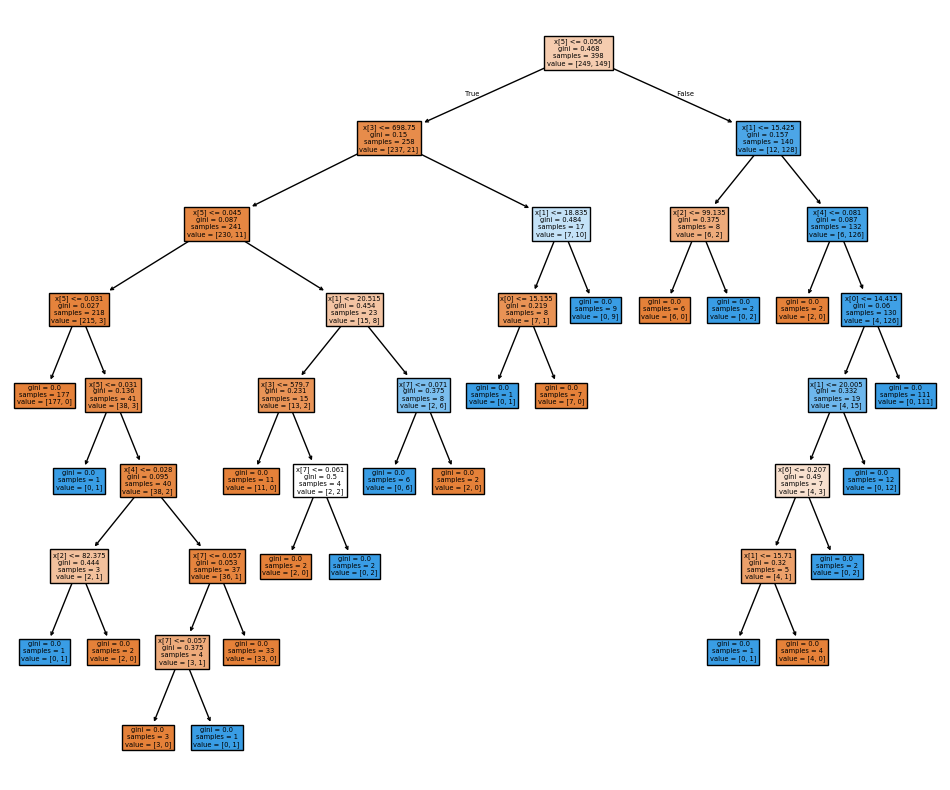

In [61]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(clf, filled=True)

In [62]:
params = {
    'criterion':['gini','entropy'],
    'max_depth':[1,2,3,4,5,6,7,8,9,10],
    'splitter':['best','random'],
    'max_features':['sqrt', 'log2', None]
}

In [63]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(estimator=clf, param_grid=params, cv=5, error_score='raise',verbose=1)

In [64]:
grid.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', 'log2', None],
                         'splitter': ['best', 'random']},
             verbose=1)

In [65]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'max_features': None,
 'splitter': 'best'}

In [66]:
grid.best_score_

0.937246835443038

In [67]:
y_pred = grid.predict(x_test)

In [68]:
confusion_matrix(y_test, y_pred)

array([[103,   5],
       [  9,  54]], dtype=int64)

In [69]:
best_tree = grid.best_estimator_

[Text(0.48863636363636365, 0.9, 'x[5] <= 0.049\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]'),
 Text(0.22727272727272727, 0.7, 'x[3] <= 698.75\nentropy = 0.287\nsamples = 239\nvalue = [227, 12]'),
 Text(0.35795454545454547, 0.8, 'True  '),
 Text(0.09090909090909091, 0.5, 'x[5] <= 0.031\nentropy = 0.153\nsamples = 226\nvalue = [221, 5]'),
 Text(0.045454545454545456, 0.3, 'entropy = 0.0\nsamples = 177\nvalue = [177, 0]'),
 Text(0.13636363636363635, 0.3, 'x[1] <= 18.1\nentropy = 0.475\nsamples = 49\nvalue = [44, 5]'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]'),
 Text(0.18181818181818182, 0.1, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]'),
 Text(0.36363636363636365, 0.5, 'x[1] <= 18.835\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]'),
 Text(0.3181818181818182, 0.3, 'x[4] <= 0.067\nentropy = 0.592\nsamples = 7\nvalue = [6, 1]'),
 Text(0.2727272727272727, 0.1, 'entropy = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.36363636363636365, 0.1, 'entr

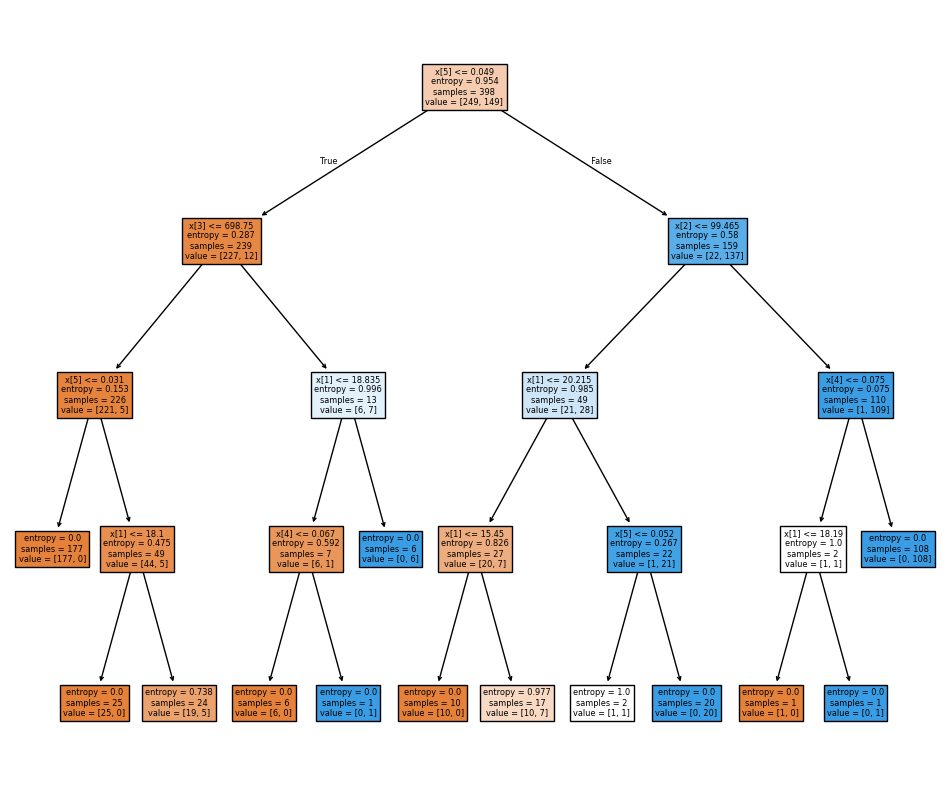

In [70]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(best_tree, filled=True)

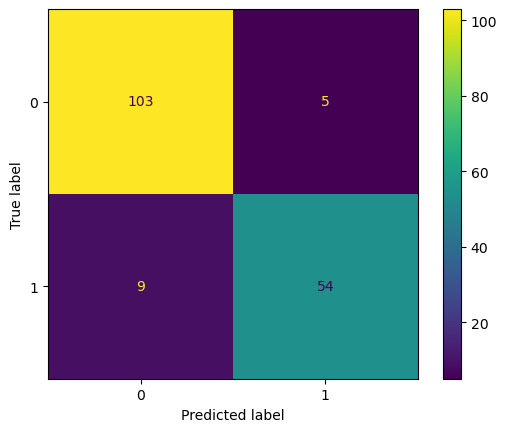

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
cm= confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

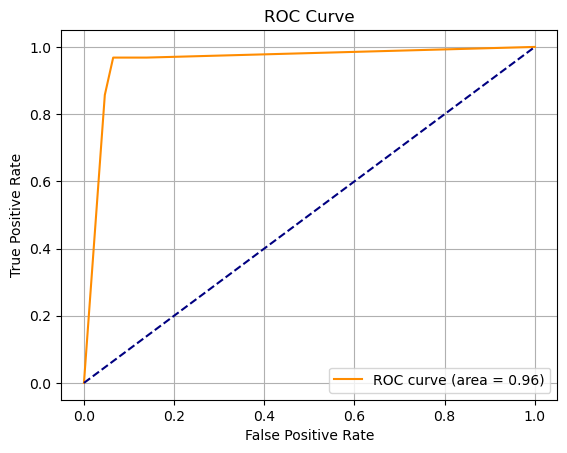

In [72]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, grid.predict_proba(x_test)[:,1])
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0,1], [0,1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

<Axes: >

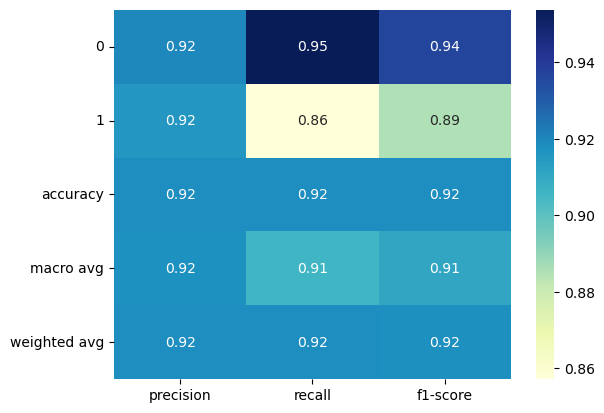

In [73]:
report = classification_report(y_test, y_pred, output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1,:].T, annot=True, cmap='YlGnBu')

[Text(0.48863636363636365, 0.9, 'concave points_mean <= 0.049\nentropy = 0.954\nsamples = 398\nvalue = [249, 149]\nclass = 0'),
 Text(0.22727272727272727, 0.7, 'area_mean <= 698.75\nentropy = 0.287\nsamples = 239\nvalue = [227, 12]\nclass = 0'),
 Text(0.35795454545454547, 0.8, 'True  '),
 Text(0.09090909090909091, 0.5, 'concave points_mean <= 0.031\nentropy = 0.153\nsamples = 226\nvalue = [221, 5]\nclass = 0'),
 Text(0.045454545454545456, 0.3, 'entropy = 0.0\nsamples = 177\nvalue = [177, 0]\nclass = 0'),
 Text(0.13636363636363635, 0.3, 'texture_mean <= 18.1\nentropy = 0.475\nsamples = 49\nvalue = [44, 5]\nclass = 0'),
 Text(0.09090909090909091, 0.1, 'entropy = 0.0\nsamples = 25\nvalue = [25, 0]\nclass = 0'),
 Text(0.18181818181818182, 0.1, 'entropy = 0.738\nsamples = 24\nvalue = [19, 5]\nclass = 0'),
 Text(0.36363636363636365, 0.5, 'texture_mean <= 18.835\nentropy = 0.996\nsamples = 13\nvalue = [6, 7]\nclass = 1'),
 Text(0.3181818181818182, 0.3, 'concavity_mean <= 0.067\nentropy = 0.59

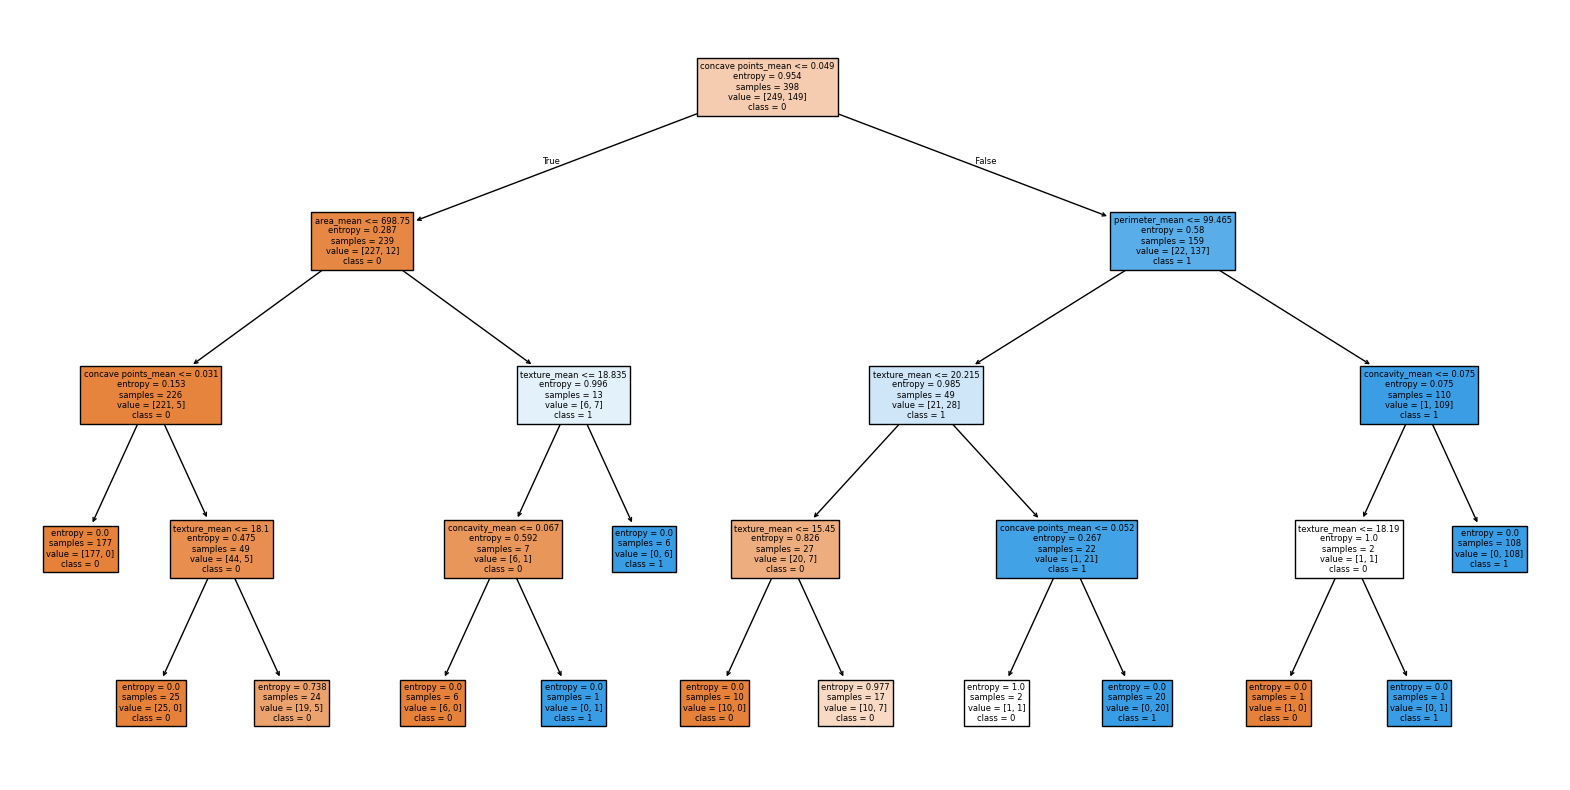

In [74]:
from sklearn.tree import plot_tree
best_tree = grid.best_estimator_

plt.figure(figsize=(20,10))
plot_tree(best_tree, filled=True, feature_names=x.columns,
          class_names=best_tree.classes_.astype(str))

In [75]:
import pickle

pickle.dump(grid, open('DTreg.pkl','wb'))